In [1]:
import pandas as pd

# You would replace this with the path to your csv or SQL query result
data = pd.read_csv("BankChurners.csv")


In [2]:
# Check for missing values
data.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

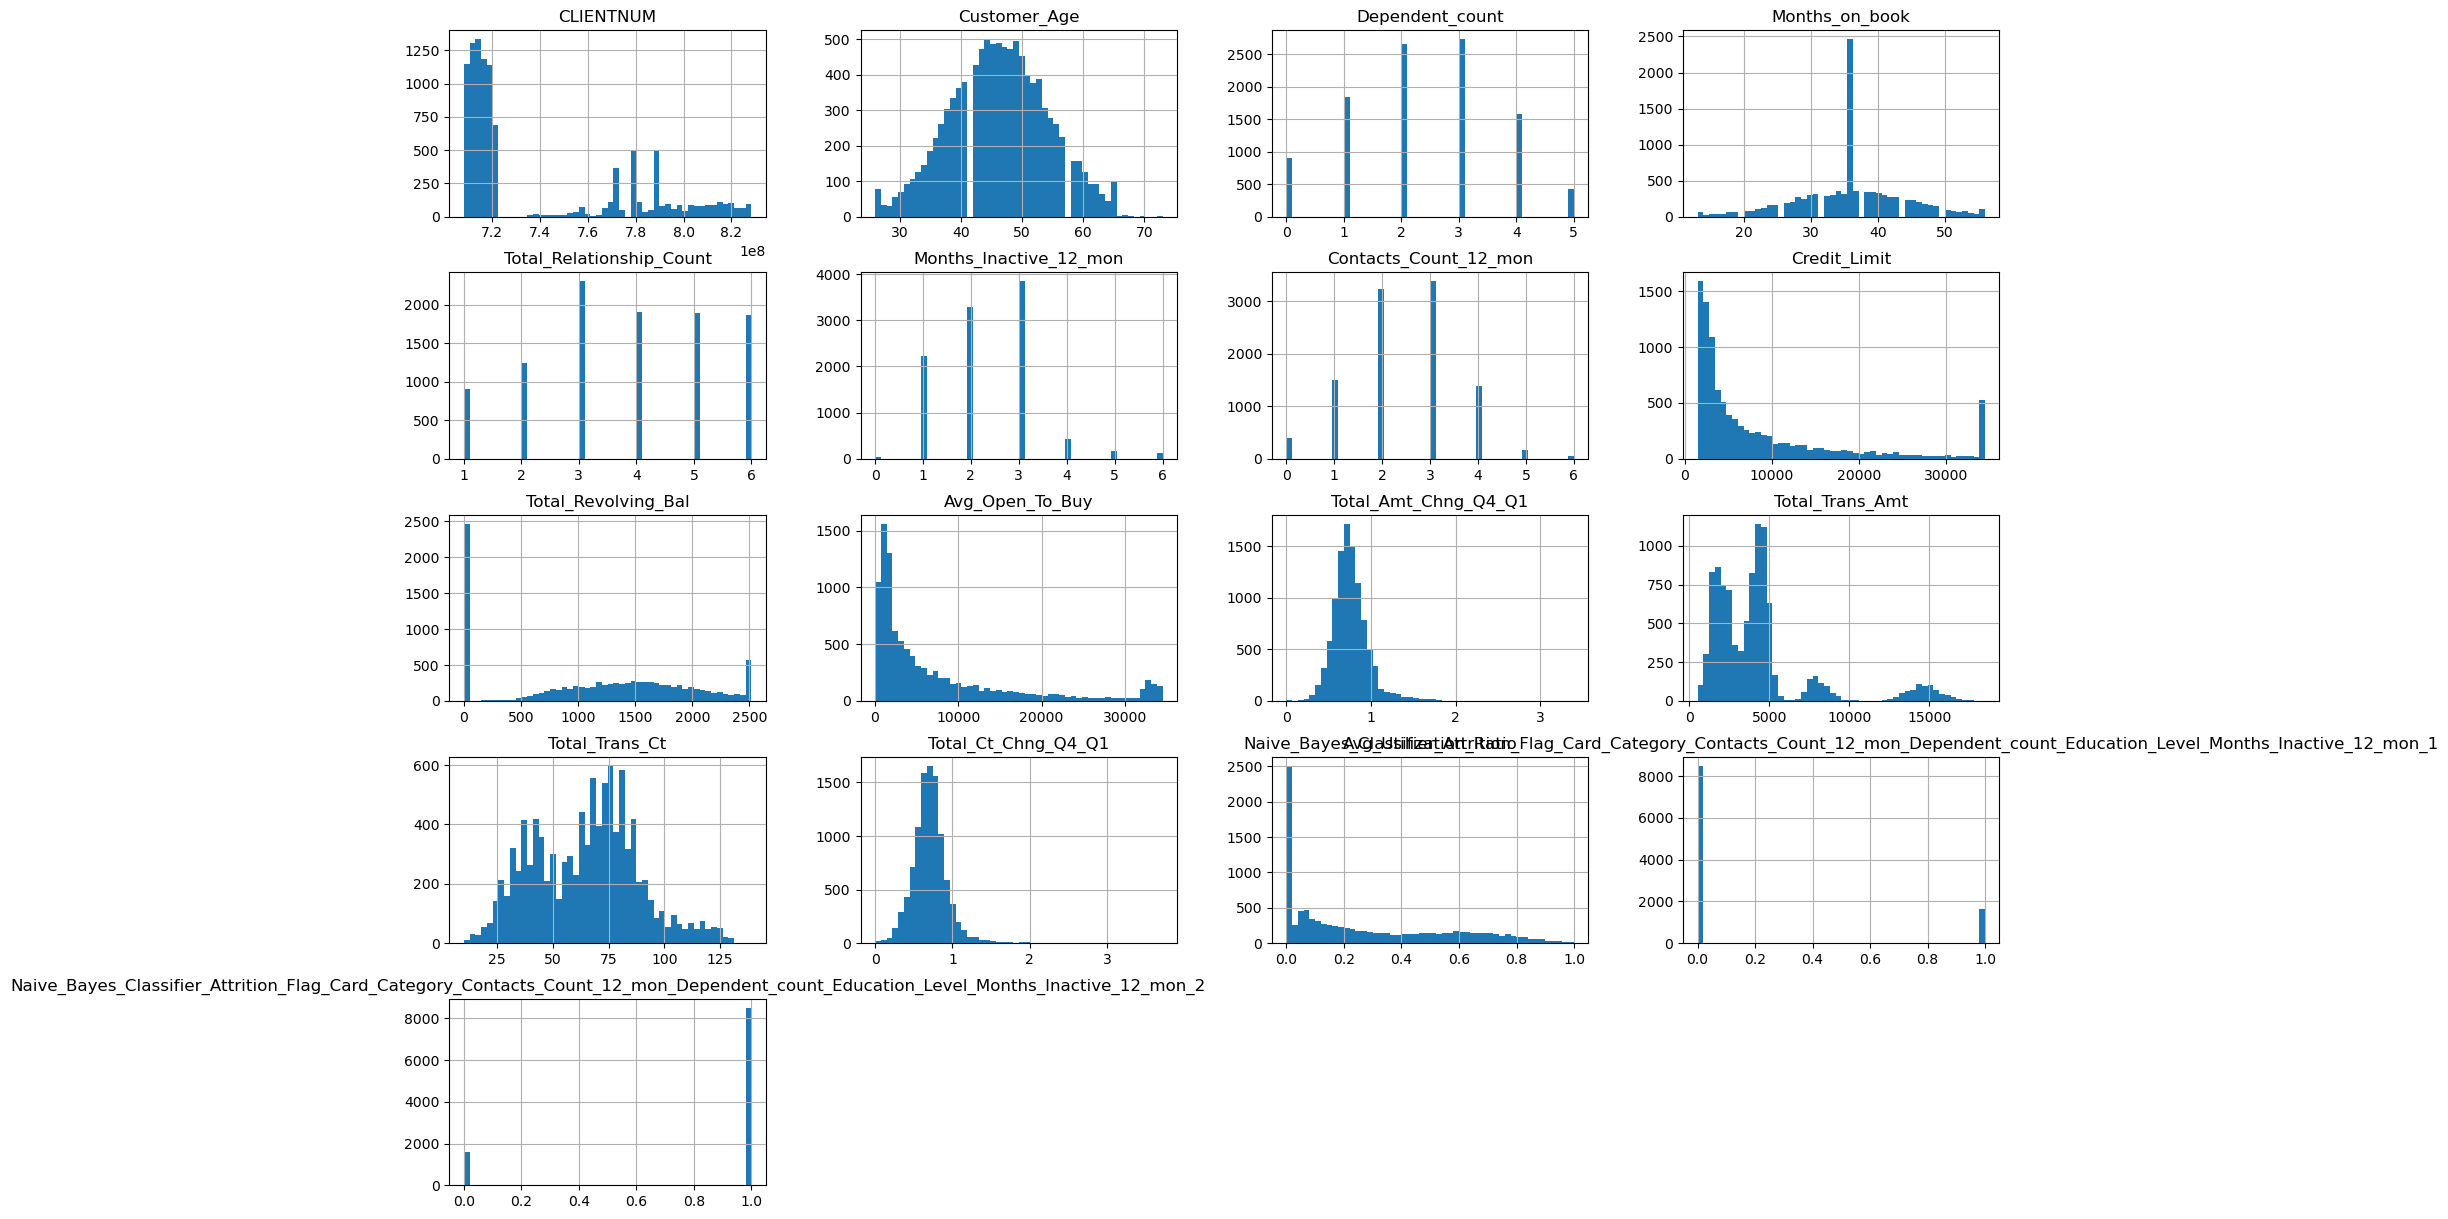

In [3]:
import matplotlib.pyplot as plt

# Plot histograms of numeric columns
data.hist(bins=50, figsize=(20,15))
plt.show()


In [11]:
# Replacing 'Existing Customer' with 0 and 'Attrited Customer' with 1 in the 'Attrition_Flag' column
data['Attrition_Flag'] = data['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1})


In [13]:
# Handle outliers - example uses Z-score to identify outliers
from scipy import stats
import numpy as np
numeric_cols = data.select_dtypes(include=[np.number]).columns

z_scores = stats.zscore(data[numeric_cols])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = data[filtered_entries]



In [23]:
# Split data into training and test sets
y = data['Attrition_Flag']
X = data.drop(['Attrition_Flag',
               'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
               'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], 
              axis=1)


In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

for feature in categorical_features:
    X[feature] = le.fit_transform(X[feature])


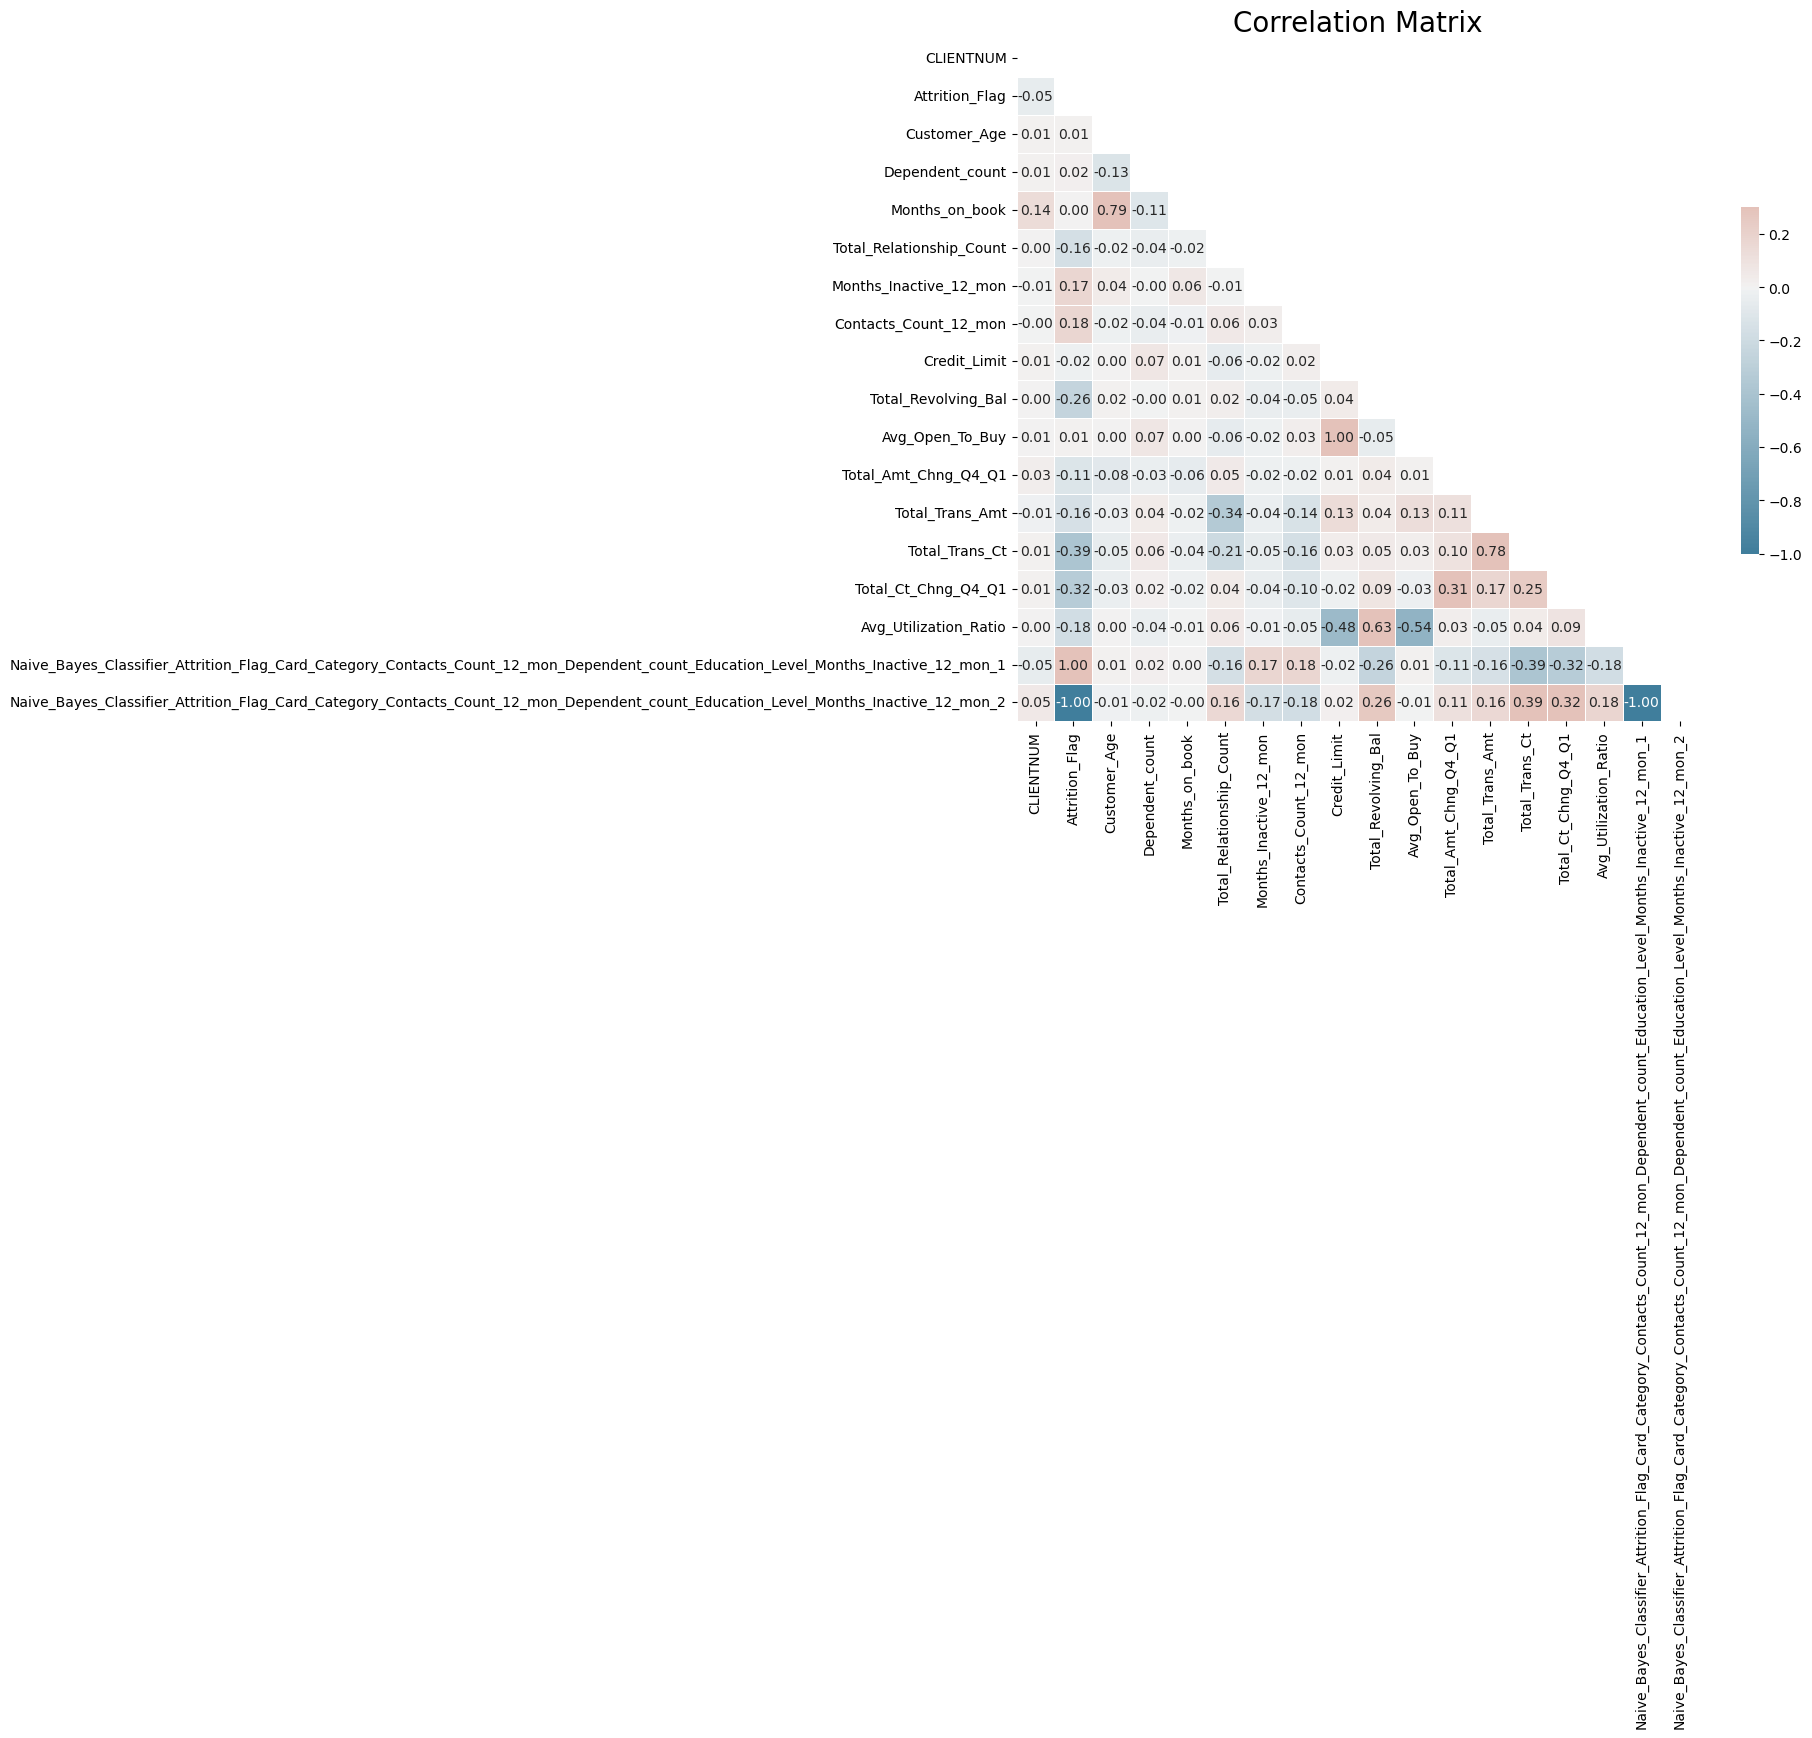

In [26]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [28]:
from sklearn.model_selection import train_test_split

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# Import the model you want to use
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression



# Scale your features, if required by your chosen model
# Note that Decision Trees and Random Forests don't require feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

In [33]:
from sklearn.metrics import classification_report

# Predict the test set results
y_pred_knn = knn.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_lr = lr.predict(X_test)

# Print classification report for each model
print("KNN Classification Report")
print(classification_report(y_test, y_pred_knn))

print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred_dt))

print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_lr))


KNN Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1571
           1       0.76      0.52      0.62       292

    accuracy                           0.90      1863
   macro avg       0.84      0.75      0.78      1863
weighted avg       0.89      0.90      0.89      1863

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1571
           1       0.83      0.80      0.81       292

    accuracy                           0.94      1863
   macro avg       0.90      0.89      0.89      1863
weighted avg       0.94      0.94      0.94      1863

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1571
           1       0.74      0.59      0.66       292

    accuracy                           0.90      1863
   macro avg       0.84 

In [34]:
from sklearn.dummy import DummyClassifier

# Creating a dummy classifier
dummy = DummyClassifier(strategy='most_frequent')

# Training the dummy classifier
dummy.fit(X_train, y_train)

# Getting a classification report
y_pred_dummy = dummy.predict(X_test)
print("Dummy Classifier Classification Report")
print(classification_report(y_test, y_pred_dummy))


Dummy Classifier Classification Report
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1571
           1       0.00      0.00      0.00       292

    accuracy                           0.84      1863
   macro avg       0.42      0.50      0.46      1863
weighted avg       0.71      0.84      0.77      1863



/opt/homebrew/anaconda3/envs/PythonData/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/PythonData/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/PythonData/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [35]:
from sklearn.model_selection import GridSearchCV

# Define the parameter values that should be searched
k_range = list(range(1, 31))

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)

# Instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# Fit the grid with data
grid.fit(X, y)

# View the complete results
grid.cv_results_


KeyboardInterrupt: 

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [38]:
y_pred = model.predict(X_test_scaled)


In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)

acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc}")


Confusion Matrix: 
[[1512   59]
 [ 120  172]]
Model Accuracy: 0.903918411164788


In [40]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier object
dtc = DecisionTreeClassifier()

# Train the model using the training sets
dtc.fit(X_train_scaled, y_train)

# Predict the response for test dataset
y_pred_dtc = dtc.predict(X_test_scaled)


In [41]:
# Model Accuracy, how often is the classifier correct?
acc_dtc = accuracy_score(y_test, y_pred_dtc)
print(f"Decision Tree Model Accuracy: {acc_dtc}")


Decision Tree Model Accuracy: 0.9447128287707998


In [42]:
feature_importances = dtc.feature_importances_
print("Feature importances:\n", feature_importances)


Feature importances:
 [0.01924234 0.03696334 0.00193616 0.00180099 0.00229789 0.00631174
 0.00196106 0.00234042 0.00621278 0.09397495 0.00992992 0.01115971
 0.02502892 0.18900221 0.01112597 0.05573547 0.15424446 0.2975275
 0.06533511 0.00786905]


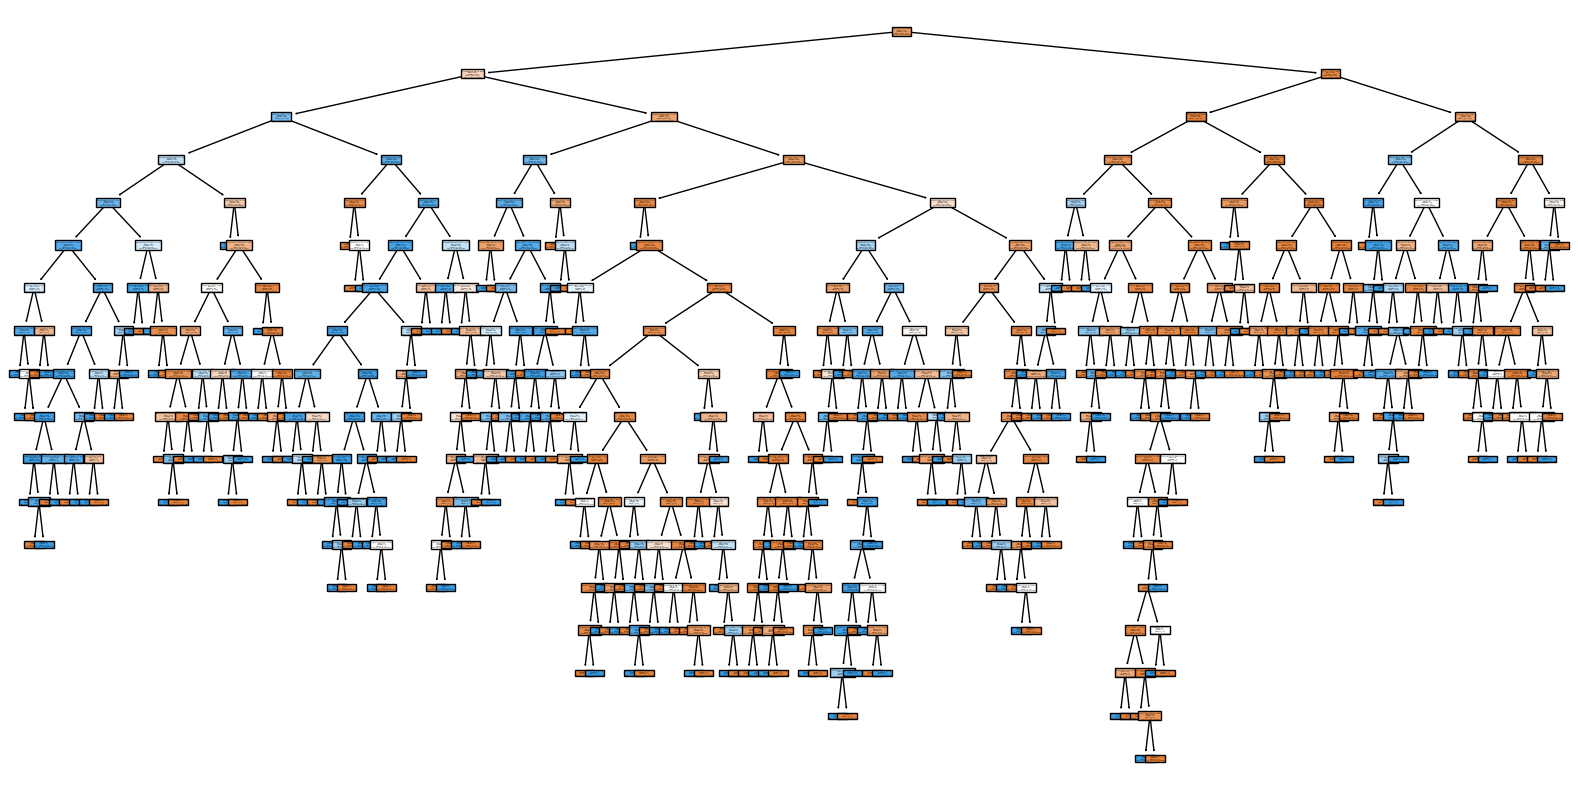

In [43]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))  
_ = plot_tree(dtc, 
              feature_names=X.columns,
              class_names=['Existing Customer', 'Attrited Customer'],
              filled=True)


In [44]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross validation
scores = cross_val_score(dtc, X_train_scaled, y_train, cv=5)
print("Cross-validation scores: ", scores)
print("Average cross-validation score: ", scores.mean())


Cross-validation scores:  [0.93154362 0.94295302 0.92281879 0.92818792 0.93422819]
Average cross-validation score:  0.9319463087248323


In [46]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict the response for test dataset
y_pred_dtc = dtc.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dtc)
print("Confusion Matrix:\n", cm)

# Classification Report
cr = classification_report(y_test, y_pred_dtc)
print("Classification Report:\n", cr)


Confusion Matrix:
 [[1522   49]
 [  54  238]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1571
           1       0.83      0.82      0.82       292

    accuracy                           0.94      1863
   macro avg       0.90      0.89      0.89      1863
weighted avg       0.94      0.94      0.94      1863



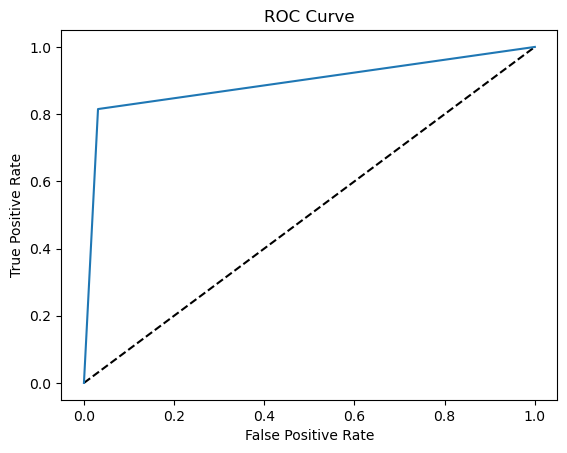

AUC:  0.8919390842583469


In [47]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute predicted probabilities: y_pred_prob
y_pred_prob = dtc.predict_proba(X_test_scaled)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Compute and print AUC score
print("AUC: ", roc_auc_score(y_test, y_pred_prob))
